In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df1 = df.iloc[:,1:]

In [4]:
df1.head()

,customer_id,review_id,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,sentiment,prob_positive,prob_negative,prob_neutral,prob_mixed
0,34553562,R2HZ5Z39CO33P3,Samsung WF42H5200AW Energy Star 4.2 Cu. Ft. Fr...,Major Appliances,5,N,"Top 5 Front Loading Washing Machine Under $1,5...",The Samsung WF42H200AW has earned a spot on Bo...,NEUTRAL,0.2429,0.0001,0.7570,0.0
1,34553562,R1XP9M6NQK0NHT,"Frigidaire FAFS4474LW Front Load Steam Washer,...",Major Appliances,5,N,"Top 5 Front Loading Washing Machines under $1,...",The Frigidaire FAFS4474LW Front Load Steam Was...,NEUTRAL,0.0427,0.0001,0.9572,0.0
2,34553562,RL2VDBGE8VOE6,EWFLS70JIW Wave-Touch Series 4.42 cu. ft. Capa...,Major Appliances,5,N,"Top 5 Front Loading Washing Machine Under $1,5...",The Electrolux EWFLS70JIW has earned a spot on...,NEUTRAL,0.0261,0.0001,0.9738,0.0
3,34553562,R205E9DIY5T2LA,GE GFWH1400DWW 4 Cu. Ft. White Stackable Front...,Major Appliances,5,N,"Top 5 Front Loading Washing Machine under $1,5...",The Speed Queen AFN50FS has earned a spot on B...,NEUTRAL,0.0862,0.0001,0.9137,0.0
4,34553562,R2EX9UU9KCFTLQ,AFN50FS 27&quot; Front-Load Washer with 2.84 c...,Major Appliances,5,N,"Top 5 Front Loading Washing Machine Under $1,5...",The Speed Queen AFN50FS has earned a spot on B...,NEUTRAL,0.0486,0.0001,0.9512,0.0


In [5]:
df1.describe()

,customer_id,star_rating,prob_positive,prob_negative,prob_neutral,prob_mixed
count,2.710600e+04,27106.000000,27106.000000,27106.000000,27106.000000,27106.000000
mean,3.017988e+07,4.438538,0.809649,0.091011,0.033859,0.065471
std,1.551739e+07,1.001274,0.349027,0.256465,0.124053,0.223598
min,9.604500e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.629649e+07,4.000000,0.870200,0.000000,0.000300,0.000000
50%,3.087312e+07,5.000000,0.996500,0.000200,0.001000,0.000000
75%,4.439716e+07,5.000000,0.999500,0.004200,0.008200,0.000100
max,5.309583e+07,5.000000,0.999900,0.999900,0.999800,0.999900


Text(0.5, 0, 'Star-Rating')

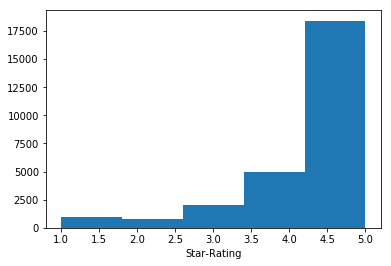

In [15]:
plt.hist(df1['star_rating'],bins=5)
plt.xlabel('Star-Rating')

Text(0.5, 0, 'Probability of Positive Sentiment')

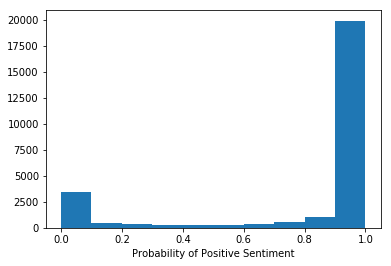

In [16]:
plt.hist(df1['prob_positive'],bins=10)
plt.xlabel('Probability of Positive Sentiment')

In [18]:
df2 = df1.groupby(['customer_id']).mean()[['star_rating','prob_positive']].sort_values(by='star_rating',ascending=False)
df2.head()
df2.shape[0]

569

In [19]:
df2[df2['star_rating'] == 5].shape[0]

51

In [20]:
df2 = df1.groupby(['customer_id']).mean()[['star_rating','prob_positive']].sort_values(by='star_rating',ascending=True)

In [21]:
df2.head()

,star_rating,prob_positive
customer_id,,
24254971,1.000000,0.000009
35926111,1.000000,0.000337
37141039,1.000000,0.022365
12048856,1.435897,0.147344
18691646,1.619565,0.181318


In [22]:
df1[df1['customer_id']==24254971].head(10)

,customer_id,review_id,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,sentiment,prob_positive,prob_negative,prob_neutral,prob_mixed
4199,24254971,R3JOWTB5EFCO1W,Giorgio Fedon 1919 Mechanical IV Steel Black D...,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4200,24254971,R1ZIGBSVL5WRMU,Giorgio Fedon 1919 Men's GFAI003 Sea Timer,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4201,24254971,R38O10MVZDFX9O,Giorgio Fedon 1919 Men's GFAG006 Vintage IV,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4202,24254971,R3FI4W0TLUPJ4X,Hawk Eye Men's Metal Watch Primary Color: Black,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4203,24254971,R4MNJU98Q5CJF,Giorgio Fedon 1919 Men's GFAF003 Vintage III,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4204,24254971,R33G5MK6MPGW4E,Giorgio Fedon 1919 Women's GIOGFAX001 Lady Tim...,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4205,24254971,R3QZ3BVR9SZJRD,Giorgio Fedon 1919 Sport Utility Black Dial Bl...,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4206,24254971,RMD8X28MHYK2,Vintage V Men's Watch Primary Color: Silver,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4207,24254971,R15KTC20PBORDT,Giorgio Fedon 1919 Gfab002 Mechanical I Mens W...,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0
4208,24254971,R33YY14GC79IAI,Giorgio Fedon 1919 Men's GFAF001 Vintage III,Watches,1,N,Crap,Giorgio Fedon watches are crap. Made in Japan....,NEGATIVE,0.0,0.9996,0.0004,0.0


In [23]:
df1[df1['customer_id']==35926111].head(10)

,customer_id,review_id,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,sentiment,prob_positive,prob_negative,prob_neutral,prob_mixed
1716,35926111,R35IFPSAWT3ENP,Simplify The 1900 Mesh Bracelet Watch - Blue,Watches,1,N,DO NOT DO IT.... SAVE YOUR MONEY,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0002,0.9995,0.0003,0.0
1717,35926111,RK3SK471OGDBB,"Simplify The 2200 Watch - black/black, adjustable",Watches,1,N,DONT DO IT... SAVE YOUR MONEY,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0004,0.9993,0.0004,0.0
1718,35926111,R25PD2USI7D2YU,Simplify 1002 The 1000 Watch,Watches,1,N,Do your self a favor... DONT BUY !!,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0002,0.9996,0.0002,0.0
1719,35926111,RANZ4W7ULI08I,Simplify Women's 2203 The 2200 Black & White L...,Watches,1,N,REMOVE FROM CART AND WALK AWAY SLOWLY,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0004,0.9990,0.0006,0.0
1720,35926111,R2RPZOGHWQWX97,Simplify The 1800,Watches,1,N,BUY A WATCH FROM ANY OTHER COMPANY - TERRIBL...,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0020,0.9970,0.0010,0.0
1721,35926111,RYUOBHN3DOQVE,Simplify The 2100 White Dial White Leather Lad...,Watches,1,N,SAVE YOUR MONEY !!,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0003,0.9996,0.0001,0.0
1722,35926111,RIY8FORO1WQV7,Simplify Men's SIM1804 The 1800 Black Leather ...,Watches,1,N,HORRIBLE WATCH !! NEVER BUYING AGAIN,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0002,0.9997,0.0001,0.0
1723,35926111,R1YAWW4QES7F9A,Simplify 0703 The 700 Watch,Watches,1,N,DONT BUY!! COMPANY HAS NO SPINE !!,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0003,0.9996,0.0001,0.0
1724,35926111,RV5V8A4Z354YO,Simplify The 2100 Leather-Band Watch - Silver/...,Watches,1,N,F^CK NO DONT BUY THIS WATCH,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0002,0.9993,0.0005,0.0
1725,35926111,R2ZT2JZ1D6NZJ9,Simplify 0705 The 700 Watch,Watches,1,N,DO NOT BUY !! SAVE YOUR MONEY FOR A REAL WATCH,can i rate this 1/4 star?<br /><br />This comp...,NEGATIVE,0.0002,0.9994,0.0003,0.0


In [24]:
df1[df1['customer_id']==35926111].iloc[0,:]['review_body']

"can i rate this 1/4 star?<br /><br />This company is in the business of discounting their (absolute BS) $200 watch down so you think you getting a good deal. In actuality they sell you a terribly constructed piss poor product. Im pretty sure they are trying to knock off a chinese knock off of a american made watch. THATS TWO KNOCK OFFS. Watch broke after 1 month. 1 e'Fing MONTH!!?!?!?  Absolutely fell apart. I emailed customer service and they told me i could buy a replacement and they wouldn't do anything for me. Sorry but when i buy products i expect them to last AT LEAST more than a month of gentle wear (office job). Terrible company, terrible watch.<br /><br />Honestly youll have better luck putting a quarter in the machine at walmart and getting the little pill bottle watch. At least that one will last."

In [25]:
df3 = df1.groupby(['customer_id','product_category']).mean()[['star_rating','prob_positive']]
df3.head()

star_rating  prob_positive
customer_id product_category                               
96045       Musical Instruments     4.965517       0.955714
            Watches                 5.000000       0.999600
433468      Watches                 4.585366       0.975924
1036276     Watches                 3.806452       0.688910
1112701     Musical Instruments     4.605263       0.841479

In [26]:
df4 = df3.groupby(['customer_id']).count()
customer = df4[df4['star_rating']>1].index

In [27]:
customer

Int64Index([   96045,  1403913,  2429197,  2548523,  2634641,  3950755,
             5792439,  6546895,  7080939,  8500366,
            ...
            52803739, 52938899, 52999377, 53037408, 53037989, 53075795,
            53083714, 53090670, 53090839, 53095826],
           dtype='int64', name='customer_id', length=285)

In [28]:
df5 = df1[df1['customer_id'].isin(customer)].groupby(['customer_id','product_category']).mean()[['star_rating','prob_positive']]
df5.head(10)

star_rating  prob_positive
customer_id product_category                               
96045       Musical Instruments     4.965517       0.955714
            Watches                 5.000000       0.999600
1403913     Furniture               5.000000       0.999640
            Musical Instruments     4.979592       0.999124
            Watches                 5.000000       0.999800
2429197     Musical Instruments     4.636364       0.750157
            Watches                 4.500000       0.916050
2548523     Furniture               5.000000       0.999400
            Musical Instruments     4.782609       0.932822
2634641     Musical Instruments     4.500000       0.871267

In [29]:
df1[df1['customer_id'].isin(customer)].groupby(['product_category']).mean()[['star_rating','prob_positive']]

,star_rating,prob_positive
product_category,,
Furniture,4.426421,0.812485
Major Appliances,4.586667,0.694165
Musical Instruments,4.487035,0.809086
Watches,4.358650,0.819634


In [30]:
df6 = df1[df1['customer_id'].isin(customer)].groupby(['customer_id']).mean()[['star_rating','prob_positive']].sort_values(by=['star_rating'])

Text(0, 0.5, 'Positive Sentiment Probability')

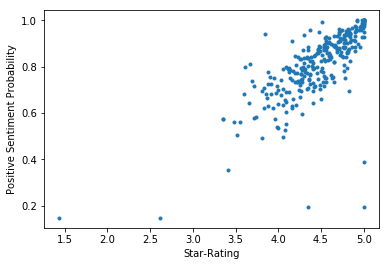

In [31]:
plt.plot(df6['star_rating'],df6['prob_positive'],'.')
plt.xlabel('Star-Rating')
plt.ylabel('Positive Sentiment Probability')

In [72]:
df1[df1['customer_id'].isin(customer)].shape[0]

14442